### Imports

In [ ]:
import sys
sys.path.append("../")

from ehr import HealthRecord

import os
import utils

import pandas as pd

# Import TSNE
from sklearn.manifold import TSNE

# Spacy imports
import scispacy
import spacy
import en_ner_bc5cdr_md

# Import Elmo
from allennlp.commands.elmo import ElmoEmbedder

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
sns.set_style('whitegrid')

In [ ]:
DATA_DIR = 'data/'

### Extract EHR data

In [ ]:
# Get all the IDs for training data
file_ids = sorted(list(set(['.'.join(fname.split('.')[:-1]) for fname in os.listdir(DATA_DIR)])))

In [ ]:
# Load SciscpaCy
scispacy_bc5cdr = en_ner_bc5cdr_md.load()

In [ ]:
# # Extract EHR records
# ehr_records = []
# for fid in file_ids:
#     record = HealthRecord(fid, text_path = DATA_DIR + fid + '.txt', 
#                           ann_path = DATA_DIR + fid + '.ann', tokenizer=scispacy_bc5cdr)
#     ehr_records.append(record)

### Load EHR Data

(If already created)

In [ ]:
ehr_records = utils.open_pickle(DATA_DIR+'processed_data/ehr_records.pkl')

### Obtain ELMo Embeddings

In [ ]:
# If GPU, set device = 0
# If CPU, set device = -1
device = 0

# Initialise ELMo model
elmo = ElmoEmbedder(cuda_device=device)

In [ ]:
# Get elmo embeddings for each entity in each EHR record

entity_name = []
entity_embeddings = []
elmo_embeddings_list = []

progress_count = 1

for record in ehr_records:
  record.set_elmo_embedder(elmo)
  elmo_embeddings = record.get_elmo_embeddings()

  for ent in entities.values():
    char_idx = ent.ranges[0][0]
    token_idx = record.get_token_idx(char_idx)
    entity_name.append(ent.name)
    entity_embeddings.append(elmo_embeddings[token_idx])

  utils.drawProgressBar(progress_count, len(ehr_records))
  progress_count += 1


Progress: [====================] 303/303

In [ ]:
# utils.save_pickle(DATA_DIR+'processed_data/ehr_elmo_embeddings.pkl', elmo_embeddings_list)
# utils.save_pickle(DATA_DIR+'processed_data/entity_name.pkl', entity_name)
# utils.save_pickle(DATA_DIR+'processed_data/entity_embeddings.pkl', entity_embeddings)

### Plot ELMo embeddings

In [ ]:
def plot_elmo_embeddings(entity_name, entity_embeddings, 
                         first_n = len(entity_name), point_size = 30):

  labels = pd.DataFrame(entity_name[:first_n], columns=["Entity"])
  vectors = entity_embeddings[:first_n]

  # Initialise TSNE
  tsne = TSNE(n_components=2)
  # Reduce to two dimensions
  Y = tsne.fit_transform(vectors)

  rcParams['figure.figsize'] = 10, 8
  sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=labels['Entity'], s=point_size)

  plt.xlabel('tSNE Component 1')
  plt.ylabel('tSNE Component 2')
  plt.title('t-SNE representation of Elmo vectors')
  plt.savefig('elmo_embeddings')
  plt.show()

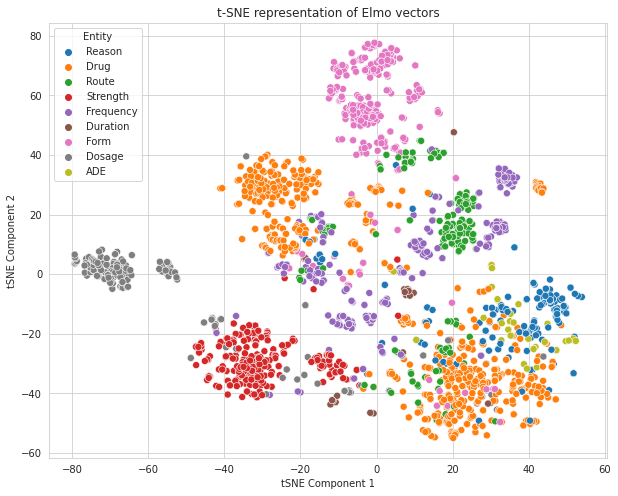

In [ ]:
plot_elmo_embeddings(entity_name, entity_embeddings, point_size=50, first_n=2000)